In [1]:
using HDF5
using Plots

In [2]:
Plots.theme(:dark)

In [3]:
module InternalUse
    mutable struct Points
        x1_start::Float32
        x2_start::Float32
        x1_step::Float32
        x2_step::Float32

        points::Matrix{Float32}
    end
end

Main.InternalUse

## Load HDF file

In [17]:
gPoints = let
    filePath = "../test.h5"
    h5open(filePath, "r") do fileId
        dataSet = fileId["/gridData/points"]
        points = read(dataSet)
        group_metaData = fileId["/gridData/metaData"]
        x1_start = read(group_metaData["x1_start"])[1]
        x2_start = read(group_metaData["x2_start"])[1]
        x1_step = read(group_metaData["x1_step"])[1]
        x2_step = read(group_metaData["x2_step"])[1]

        InternalUse.Points(
            x1_start,
            x2_start,
            x1_step,
            x2_step,
            points
        )
    end
end;

## Plot data

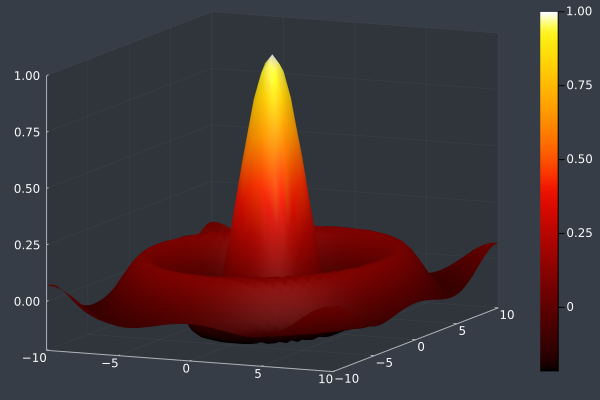

In [29]:
let
    x1 = range(gPoints.x1_start, step=gPoints.x1_step, length=size(gPoints.points, 1))
    x2 = range(gPoints.x2_start, step=gPoints.x2_step, length=size(gPoints.points, 2))
    plt1 = plot(x1, x2, gPoints.points, st=:surface)
    plt2 = plot(x1, x2, gPoints.points, st=:wireframe)
end